In [2]:
from sklearn.externals import joblib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Jiaxin He\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
abc = joblib.load('adaboost_tree_classifier.pickle')
dtc = joblib.load('decision_tree_classifier.pickle')
rfc = joblib.load('random_forest_classifier.pickle')
svm = joblib.load('svm_classifier.pickle')

In [7]:
data = pd.read_csv('african_crises.csv')
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [11]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')
X_train = df_train.drop(columns=['year','banking_crisis','gdp_weighted_default'])
X_test = df_test.drop(columns=['year','banking_crisis','gdp_weighted_default'])
y_train = df_train.banking_crisis
y_test = df_test.banking_crisis

C:\Users\Jiaxin He\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


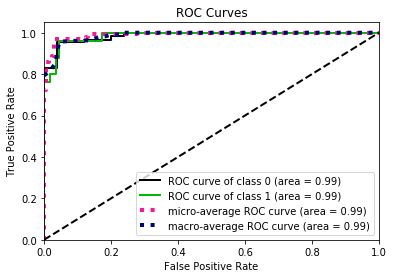

C:\Users\Jiaxin He\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


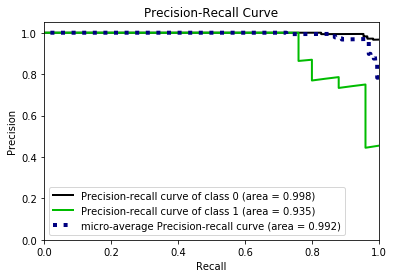

In [15]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_test
y_probas = rfc.predict_proba(X=X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.show()

## Feature Importance

In [10]:
dtc.feature_importances_
feature_importance = list(zip(X_train.columns,dtc.feature_importances_))
feature_importance.sort(key = lambda x: -x[1])
important_features = [(f,v) for (f,v) in feature_importance if v != 0]
important_features

[('systemic_crisis', 0.8102027348076282),
 ('inflation_annual_cpi_1', 0.12903878600863913),
 ('country_Kenya', 0.02446212580020596),
 ('inflation_annual_cpi', 0.01768761288738618),
 ('exch_usd_1', 0.015385179150352481),
 ('exch_usd_2', 0.003223561345788149)]

In [15]:
feature_importance = list(zip(X_train.columns,abc.feature_importances_))
feature_importance.sort(key = lambda x: -x[1])
important_features = [(f,v) for (f,v) in feature_importance if v != 0]
important_features[:10]

[('systemic_crisis', 0.32615597332352136),
 ('systemic_crisis_1', 0.13987142398511285),
 ('banking_crisis_1', 0.09894752460461473),
 ('inflation_annual_cpi', 0.05086452229465423),
 ('exch_usd_1', 0.04027798441394401),
 ('inflation_annual_cpi_1', 0.037101775137197236),
 ('inflation_annual_cpi_2', 0.032279181240961394),
 ('exch_usd_3', 0.03197555529385706),
 ('inflation_annual_cpi_3', 0.03134424556289883),
 ('systemic_crisis_2', 0.030690788676623455)]

In [16]:
feature_importance = list(zip(X_train.columns,rfc.feature_importances_))
feature_importance.sort(key = lambda x: -x[1])
important_features = [(f,v) for (f,v) in feature_importance if v != 0]
important_features[:10]

[('systemic_crisis', 0.32615597332352136),
 ('systemic_crisis_1', 0.13987142398511285),
 ('banking_crisis_1', 0.09894752460461473),
 ('inflation_annual_cpi', 0.05086452229465423),
 ('exch_usd_1', 0.04027798441394401),
 ('inflation_annual_cpi_1', 0.037101775137197236),
 ('inflation_annual_cpi_2', 0.032279181240961394),
 ('exch_usd_3', 0.03197555529385706),
 ('inflation_annual_cpi_3', 0.03134424556289883),
 ('systemic_crisis_2', 0.030690788676623455)]

In [17]:
feature_importance = list(zip(X_train.columns,svm.coef_[0]))
feature_importance.sort(key = lambda x: -x[1])
important_features = [(f,v) for (f,v) in feature_importance if v != 0]
important_features[:10]

[('systemic_crisis', 1.9634170396944306),
 ('banking_crisis_1', 0.0877730625076562),
 ('domestic_debt_in_default', 0.05002495019881218),
 ('country_Central African Republic', 0.04479263624741278),
 ('country_Algeria', 0.03681754844584412),
 ('sovereign_external_debt_default_3', 0.03073262659301909),
 ('systemic_crisis_1', 0.029726846960669545),
 ('banking_crisis_2', 0.027636926161646716),
 ('country_Morocco', 0.027471048025767247),
 ('systemic_crisis_3', 0.025176786851505054)]

### Systemic Crisis

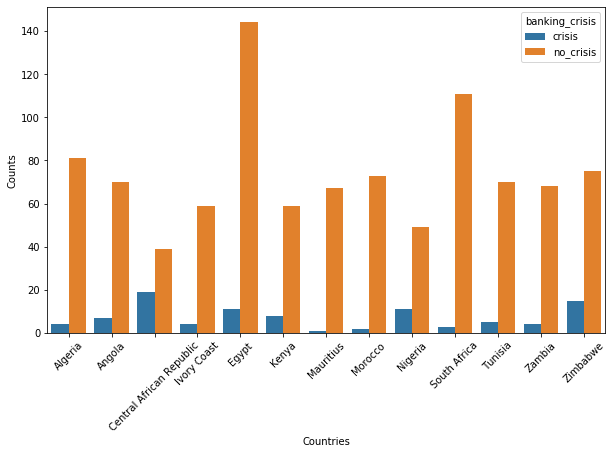

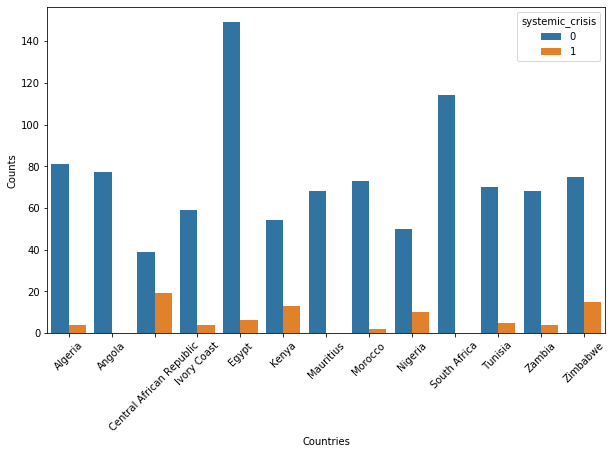

In [35]:
cols = ['banking_crisis', 'systemic_crisis']
for col in cols:
    fig,ax = plt.subplots(figsize=(10,6))
    sns.countplot(data['country'],hue=data[col],ax=ax)
    plt.xlabel('Countries')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)

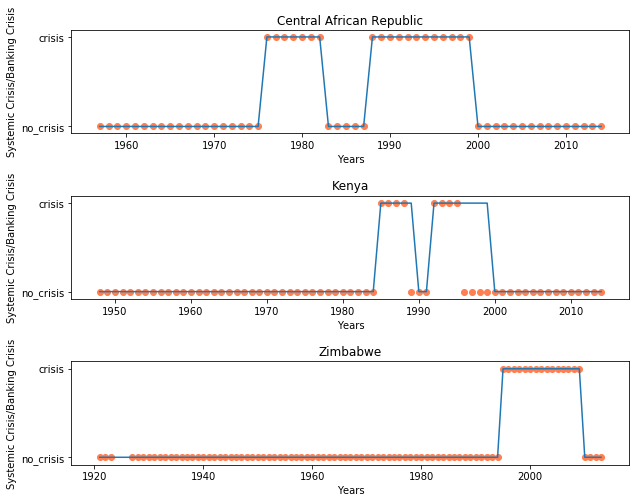

In [68]:
systemic = data[['year','country', 'systemic_crisis', 'exch_usd', 'banking_crisis']]
systemic = systemic[(systemic['country'] == 'Central African Republic') | (systemic['country']=='Kenya') | (systemic['country']=='Zimbabwe') ]
plt.figure(figsize=(10,8))
count = 1

for country in systemic.country.unique():
    plt.subplot(len(systemic.country.unique()),1,count)
    subset = systemic[(systemic['country'] == country)]
    sns.lineplot(subset['year'],subset['systemic_crisis'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Systemic Crisis/Banking Crisis')
    plt.title(country)
    count+=1

A systemic crisis is described as a domino effect when financial trouble spreads; systemic crisis happens between institutions and markets until it affects the whole the country's financial system with dire global economic consequences. Under the definition of systemic crisis, there should be a link between systemic crisis and banking crisis.
<br/><br/>
From the exploratory analysis, Central African Republic followed by Zimbabwe and Kenya has the highest counts of systemic crisis and most counts of banking crisis. 
<br/><br/>
The results from our four best-performing models show that systemic crisis has the highest correlation/feature importance with banking crisis, which prove the assumption.

### Inflation Annual CPI

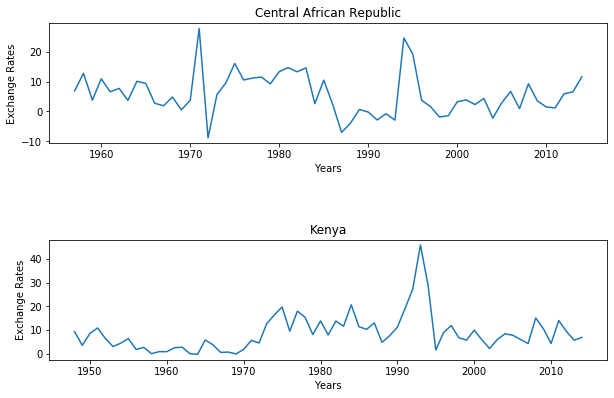

In [62]:
plt.figure(figsize=(10,50))
count = 1
for country in ['Central African Republic','Kenya']:
    plt.subplot(len(data.country.unique()),1,count)
    count+=1
    sns.lineplot(data[data.country==country]['year'],data[data.country==country]['inflation_annual_cpi'])
    plt.subplots_adjust(hspace=0.8)
    plt.xlabel('Years')
    plt.ylabel('Exchange Rates')
    plt.title(country)

The other feature that we see which has high importance in the models is inflation annual cpi. The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. 
<br/><br/>
Those with tangible assets, like property or stocked commodities, may like to see some inflation as that raises the value of their assets. People holding cash may not like inflation, as it erodes the value of their cash holdings. Ideally, an optimum level of inflation is required to promote spending to a certain extent instead of saving, thereby nurturing economic growth. So the CPI influences the saving willingness of the public and thus would affects the happending of banking crisis.
<br/><br/>
As prices rise, a single unit of currency loses value as it buys fewer goods and services. This loss of purchasing power impacts the general cost of living for the common public which ultimately leads to a deceleration in economic growth.

### USD Exchange Rate

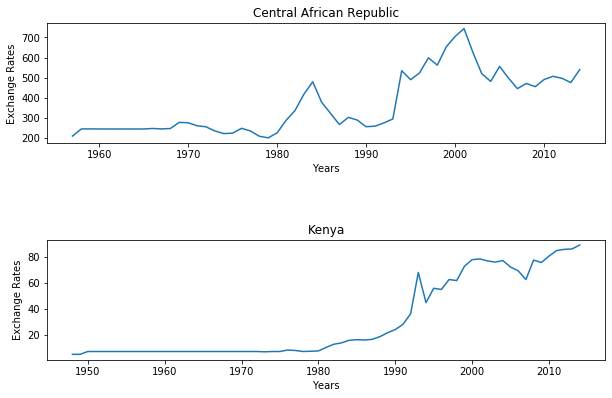

In [65]:
plt.figure(figsize=(10,50))
count = 1
for country in ['Central African Republic','Kenya']:
    plt.subplot(len(data.country.unique()),1,count)
    count+=1
    sns.lineplot(data[data.country==country]['year'],data[data.country==country]['exch_usd'])
    plt.subplots_adjust(hspace=0.8)
    plt.xlabel('Years')
    plt.ylabel('Exchange Rates')
    plt.title(country)

Anohter feature that constantly appears in the most important features is the excahnge rate of the country's currency vs USD. 
<br/><br/>
Currency values fluctuate depending on several factors including a nation's economic activity and growth prospects, interest rates, and geopolitical risk. When currencies fluctuate wildly, they can create economic uncertainty and instability, affecting capital flows and international trade. The value of the domestic currency in the foreign exchange market is an important instrument in a central bank’s toolkit, as well as a key consideration when it sets monetary policy. Directly or indirectly, currency levels affect a number of key banking policy and economic markets.